<a href="https://colab.research.google.com/github/Anikethb05/Quantum-Computing/blob/main/Grover's_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Algorithm

In [175]:
# !pip install qiskit qiskit-aer pylatexenc

In [176]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCMTGate, XGate
from matplotlib import pyplot as plt
import numpy as np

In [177]:
QC=QuantumCircuit(3,3)

## Initialization

In [178]:
QC.h(0)
QC.h(1)
QC.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

## Oracle

In [179]:
oracle=MCMTGate(XGate(),2,1,ctrl_state="01")
QC.append(oracle,[0,1,2])
QC.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

## Diffuser

In [180]:
QC.h([0,1])
QC.x([0,1])
QC.h(1)
#QC.cx(0,1)
diff=MCMTGate(XGate(),1,1,ctrl_state="1")
QC.append(diff,[0,1])
QC.h(1)
QC.x([0,1])
QC.h([0,1])
QC.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

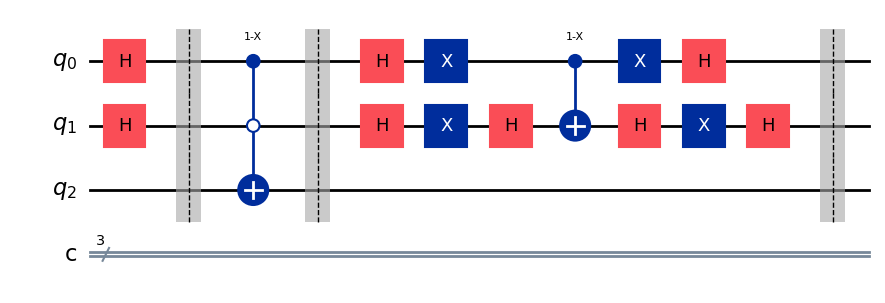

In [181]:
QC.draw('mpl')

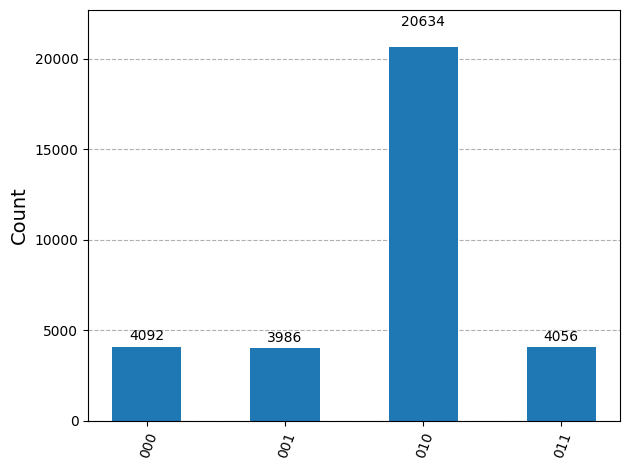

In [182]:
QC.measure(0,1)
QC.measure(1,0)
backend=AerSimulator()
QCT=transpile(QC,backend)
jobs=backend.run(QCT,shots=1024*32)
result=jobs.result()
counts=result.get_counts()
plot_histogram(counts)